<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Charting and Data Visualization Demo</b>
</header>

This notebook demonstrates the ability to Visualize result sets and other data sets using Teradata SQL Notebook %chart magic command. 
<p><b>***NOTE: To execute the SQL or magic command in the cell, press SHIFT+ENTER or the run button in the toolbar.</b>

The %chart magic supports

* the creation of simple Vega-Lite charts based on Vantage database query result sets
* rendering of more advanced Vega and Vega-Lite charts in a Teradata SQL Notebook
* the use of other CSV and JSON data sources for charting and visualization

This notebook provides SQL statements to create sample tables and uses the %dataload magic to load sample data. You will be able to execute magic commands to query the tables and visualize %chart options. Several examples of more advanced Vega and Vega-Lite charts are also provided.

For more details on Vega and Vega-Lite charts see https://vega.github.io/vega/ and https://vega.github.io/vega-lite/

#### Chart Generation
When a chart is generated from a Teradata SQL result set using the %chart magic, the chart spec file is written to the Teradata/Charts directory with the name \<ResultSetID\>.json, where \<ResultSetID\> is the time-stamp ID of the result set found in the Teradata/ResultSets directory.

For example, if the result set is in

      Teradata/ResultSets/2019.09.06_16.37.27.534_PDT

the chart file would be

      Teradata/Charts/2019.09.06_16.37.27.534_PDT.json

#### Chart Data
Chart specifications, whether generated, created manually or acquired from an external source, can be applied to data from a Teradata SQL result set or another external source. Both JSON and CSV formatted data are supported.

This allows you to
* apply different result sets to the same chart spec
  * %chart spec=2019.09.06_16.37.27.534_PDT.json, id=2019.09.06_16.37.27.534_PDT
  * %chart spec=2019.09.06_16.37.27.534_PDT.json, id=2019.09.09_13.42.23.830_PDT
* apply different data sets to the same chart spec
  * %chart spec=mycharts/myspec.json, data=data/dataset1.json
  * %chart spec=mycharts/myspec.json, data=data/dataset2.json
* apply different chart specs to the same result set or data set
  * %chart spec=myspec1.json, id=145
  * %chart spec=myspec2.json, id=145
  
Data can be embedded in a chart ("values" element) or can be referenced from the chart in a separate data file ("url" element). 

If chart data is not specified with the **spec** (with embedded data), **data** or **id** parameters, the most recent result set is used.

#### Chart Editing
Chart specification files are JSON formatted and can be edited using any text editor or specialized JSON editor.

In the upper right corner of each chart is a menu (a circle containing ...) which supports several options.

* Save as SVG
* Save as PNG
* View Source
* View Compiled Vega
* Open in Vega Editor

The 'View Source' and 'Open in Vega Editor' options are useful for editing a chart spec. 

'View Source' will open a new browser tab with the chart spec. While this can't be edited directly, it can be copied to an editor and saved to a new chart spec file which can be rendered using the %chart command.

'Open in Vega Editor' will open the chart spec in an external Vega/Vega-Lite editor. This option requires the data to be embedded in the chart and allows the chart to be edited next to a live rendering of the chart. This is very useful because you can see the results of any changes immediately. To save any changes, you will need to export the chart back to your local system. The newly edited chart can then be rendered into your notebook with the %chart magic.

It is also possible to edit a chart locally with a live view of the changes:

* right-click the chart file and selecting Open With -> Vega-Lite3 or Vega5
  * opens the chart in a separate tab
* right-click the chart file again and select Open With -> Editor
  * opens the chart spec in a separate editor tab
* drag one of the tabs to be next to or above or below the other
* any edits made in the chart spec in the editor tab will be rendered immediately in the chart tab
  * note using this method, it is possible that the rendered chart may crash if any syntax errors are introduced

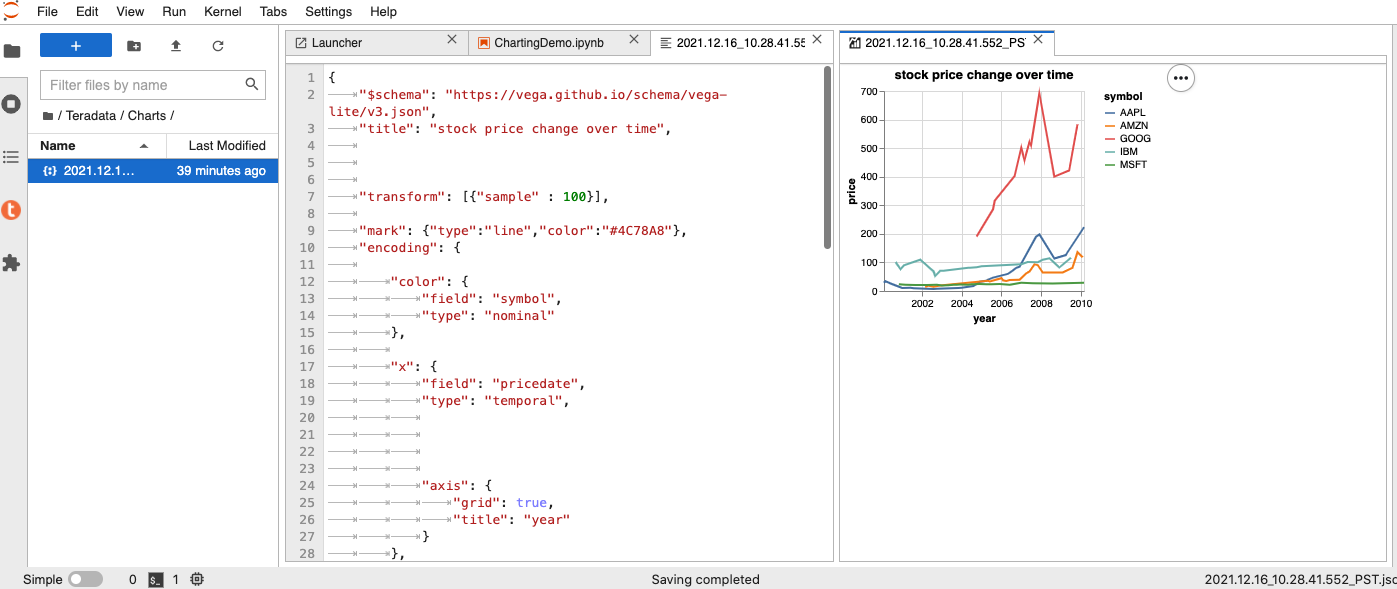

#### Advanced Charting
Charts generated using the %chart magic support a limited set of capabilities. Vega and Vega-Lite support a large variety of complex charting capabilities. More advanced charts can be create by

* editing a chart generated by the %chart magic
* pulling in a chart from an external source (web, other user, etc.)
* manually editing a chart spec

Any Vega or Vega-Lite spec can be rendered in a Teradata SQL notebook using the %chart magic with the **spec** parameter (see examples below).

#### Help for the %chart magic

In [1]:
%help chart

#### %chart
Display a Vega-Lite visualization of a query result set or an existing Vega or VegaLite chart.

%chart x=&lt;XColumnName&gt;, y=&lt;YColumnName&gt;,</br>
[title=&lt;ChartTitle&gt;,] [id=&lt;ResultSetID&gt;|&lt;HistoryID&gt;,] [part=&lt;PartNum&gt;]</br>
[labelx=&lt;XLabel&gt;,] [labely=&lt;YLabel&gt;,]</br>
[gridx=&lt;ttrue|false&gt;,] [gridy=&lt;true|false&gt;,]</br>
[typex=&lt;q|n|o|t&gt;,] [typey=&lt;q|n|o|t&gt;,]</br>
[aggregatex=&lt;count|sum|mean|median|min|max|stdev&gt;,] [aggregatey=&lt;count|sum|mean|median|min|max|stdev&gt;,]</br>
[binx=&lt;true|false&gt;,] [biny=&lt;true|false&gt;,]</br>
[sortx=&lt;ascending|descending&gt;,] [sorty=&lt;ascending|descending&gt;,]</br>
[timeunitx=&lt;year|quarter|month|day|week|dayofyear|hours&gt;,] [timeunity=&lt;year|quarter|month|day|week|dayofyear|hours&gt;,]</br>
[mark=&lt;arc|area|bar|circle|line|point|rect|rule|square|text|tick&gt;,]</br>
[color=&lt;CSSColorSpec&gt;,] [height=&lt;ChartHeight&gt;,] [width=&lt;ChartWidth&gt;]</br>
[groupingcol=&lt;ColumnNameOfGroupingField&gt;,] [typegroupingcol=&lt;q|n|o|t&gt;,]</br>
[sample=&lt;SizeOfRandomSample&gt;,]</br>
[spec=&lt;ChartSpec&gt;, [data=&lt;ChartData&gt;]]

* **groupingcol** is the name of the column used for grouping for multi series chart or stacked chart.
* **typex** and **typey** and **typegroupingcol** values: q=quantitative n=nominal o=ordinal t=temporal
  * (defaults based on column type: numeric types -> quantitative, time times -> temporal, other types -> nominal)
* **&lt;ResultSetID&gt;** is the timestamp/directory name of the result set.
* **&lt;HistoryID&gt;** is the id of the history item (see **%history** command).
* If the **id** is not specified, the most recently accessed result set is displayed.
* **aggregatex** and **aggregatey** values: count, sum, mean, variance, stdev, median, min, max. For a full list, see vega.github.io/vega-lite/docs/aggregate.html#ops
* **binx** and **biny** set to "true" to discretize numeric values into a set of bins.
* **timeunitx** and **timeunity** discretize times. for a full list of supported values, see vega.github.io/vega-lite/docs/timeunit.html
* **sample** filters data to a random sample of specified size.
* The **spec** parameter is used to display an existing chart spec.
* If **spec** is used, only **data**, **id**, and **part** parameters are supported.

- <b>x</b> and **y** - represent the x and y axes of the graph. These values must be specified.
- **title** - the title displayed above the chart (optional)
- **id** - the history id or result set id to use as input (most recently accessed if not specified)
- **labelx** - the label of the x axis (default is the x column name)
- **labely** - the label of the y axis (default is the y column name)
- **gridx** - whether to show grid lines for the x axis (default is true)
- **gridy** - whether to show grid lines for the y axis (default is true)
- **mark** - the type of chart to show (bar, line, area, point, rect, square, text, tick) (default is bar)
- **typex** and **typey** - the data type of the x and y axes __[(see the vega-lite specification)](https://vega.github.io/vega-lite/docs/type.html)__
    - q=quantitative - represents quatity values - generally numeric values
    - n=nominal - categorical data values based only on their names or categories. E.g., gender, nationality, music genre.
    - o=ordinal - represents ranked order (1st, 2nd, …) by which the data can be sorted. There is no notion of relative degree of difference between values
    - t=temporal - time and date/time values
    - default types are assigned based on the column data types
        - numeric types -> quantitative
        - time times -> temporal
        - other types -> nominal


#### Establish a connection.  

In [2]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


#### Create a table to store sales center data.

In [3]:
CREATE MULTISET TABLE SalesCenter ,
     NO BEFORE JOURNAL,
     NO AFTER JOURNAL,
     CHECKSUM = DEFAULT,
     DEFAULT MERGEBLOCKRATIO
     (
      Sales_Center_id INTEGER NOT NULL,
      Sales_Center_Name VARCHAR(255) CHARACTER SET LATIN NOT CASESPECIFIC)
NO PRIMARY INDEX ;

Success: 0 rows affected

In [4]:
help database demo_user

,Table/View/Macro name,Kind,Comment,Protection,Creator Name,Commit Option,Transaction Log,Table/View/Macro Dictionary Name,Table/View/Macro SQL Name,Table/View/Macro Name UEscape,Creator Dictionary Name,Creator SQL Name,Creator Name UEscape,Table Flavor
1,ADS_test_data,T,,F,DEMO_USER,N,Y,ADS_test_data,ADS_test_data,,DEMO_USER,DEMO_USER,,
2,ADS_train_data,T,,F,DEMO_USER,N,Y,ADS_train_data,ADS_train_data,,DEMO_USER,DEMO_USER,,
3,Anomoly_Target,T,,F,DEMO_USER,N,Y,Anomoly_Target,Anomoly_Target,,DEMO_USER,DEMO_USER,,
4,aoa_byom_models,T,,F,DBC,N,Y,aoa_byom_models,aoa_byom_models,,DBC,DBC,,
5,aoa_statistics_metadata,O,,F,DBC,N,Y,aoa_statistics_metadata,aoa_statistics_metadata,,DBC,DBC,,
6,BYOM_PMMLMODELS_REPOSITORY,T,,F,DEMO_USER,N,Y,BYOM_PMMLMODELS_REPOSITORY,BYOM_PMMLMODELS_REPOSITORY,,DEMO_USER,DEMO_USER,,
7,county_accessibility,V,,F,DEMO_USER,N,Y,county_accessibility,county_accessibility,,DEMO_USER,DEMO_USER,,
8,DF_Predict,T,,F,DEMO_USER,N,Y,DF_Predict,DF_Predict,,DEMO_USER,DEMO_USER,,
9,DF_Predict_test,T,,F,DEMO_USER,N,Y,DF_Predict_test,DF_Predict_test,,DEMO_USER,DEMO_USER,,
10,DF_train,T,,F,DEMO_USER,N,Y,DF_train,DF_train,,DEMO_USER,DEMO_USER,,


#### Load data into the SalesCenter table using the %dataload magic
Run %help dataload for more information on using the %dataload magic.

In [5]:
%dataload DATABASE=demo_user, TABLE=SalesCenter, FILEPATH=Getting_Started/Charting_and_Visualization/data/salescenter.csv

Using database: demo_user
2023-07-07T08:50:32.985 Start Batch Loading...
     
Data Load: Number Rows Loaded = 20, Elapsed Time = 00:00:00.288, History ID = 115
Success Loading Data: from file,'/home/jovyan/JupyterLabRoot/Getting_Started/Charting_and_Visualization/data/salescenter.csv', into table, demo_user.SalesCenter.

#### Verify data was inserted

In [6]:
SELECT * FROM SalesCenter ORDER BY 1

,Sales_Center_id,Sales_Center_Name
1,1111,Phoenix
2,1112,South Bend
3,1113,Jacksonville
4,1114,Fort Wayne
5,1115,Billings
6,1116,Portland
7,1117,Ashland
8,1118,Wacco
9,1119,Flint
10,2000,Arlington


#### Create a table with sales demo data

In [7]:
CREATE MULTISET TABLE SalesDemo ,
     NO BEFORE JOURNAL,
     NO AFTER JOURNAL,
     CHECKSUM = DEFAULT,
     DEFAULT MERGEBLOCKRATIO
     (
      Sales_Center_ID INTEGER NOT NULL,
      UNITS DECIMAL(15,4),
      SALES DECIMAL(15,2),
      COST DECIMAL(15,2))
NO PRIMARY INDEX ;

Success: 0 rows affected

#### Load data into the SalesDemo table using the %dataload magic

In [8]:
%dataload DATABASE=demo_user, TABLE=SalesDemo, FILEPATH=Getting_Started/Charting_and_Visualization/data/salesdemo.csv

Using database: demo_user
2023-07-07T08:50:33.505 Start Batch Loading...
     
Data Load: Number Rows Loaded = 30, Elapsed Time = 00:00:00.276, History ID = 118
Success Loading Data: from file,'/home/jovyan/JupyterLabRoot/Getting_Started/Charting_and_Visualization/data/salesdemo.csv', into table, demo_user.SalesDemo.

#### Verify that the sales demo data inserted successfully

In [9]:
SELECT * FROM SalesDemo ORDER BY sales

,Sales_Center_ID,UNITS,SALES,COST
1,8888,.0000,.00,.00
2,2222,.0000,.00,.00
3,1119,.0000,.00,.00
4,1115,.0000,.00,.00
5,1111,.0000,.00,.00
6,9999,.0000,.00,.00
7,1111,.0000,.00,.00
8,7777,.0000,.00,.00
9,5555,.0000,.00,.00
10,9999,.0000,.00,.00


#### Create a result set from the sales data

In [10]:
SELECT f.sales, f.sales_center_id, s.sales_center_name FROM SalesDemo f
  INNER JOIN SalesCenter s ON s.Sales_Center_id = f.Sales_Center_id

,SALES,Sales_Center_ID,Sales_Center_Name
1,.00,1111,Phoenix
2,.00,1111,Phoenix
3,.00,2222,Bend
4,18.75,2222,Bend
5,43.78,3333,Omaha
6,32.00,3333,Omaha
7,65.73,4444,Louisville
8,20.85,4444,Louisville
9,.00,5555,Bismark
10,7.97,5555,Bismark


#### Create a table with stock price data

In [11]:
CREATE MULTISET TABLE stocks ,
     NO BEFORE JOURNAL,
     NO AFTER JOURNAL,
     CHECKSUM = DEFAULT,
     DEFAULT MERGEBLOCKRATIO,
     MAP = TD_MAP1
     (
      symbol VARCHAR(20) CHARACTER SET LATIN CASESPECIFIC,
      pricedate VARCHAR(20) CHARACTER SET LATIN CASESPECIFIC,
      price FLOAT)
NO PRIMARY INDEX ;

Success: 0 rows affected

In [12]:
%dataload DATABASE=demo_user, TABLE=stocks, FILEPATH=Getting_Started/Charting_and_Visualization/data/stocks.csv, skiprows=1

Using database: demo_user
2023-07-07T08:50:34.189 Start Batch Loading...
     
Data Load: Number Rows Loaded = 560, Elapsed Time = 00:00:00.276, History ID = 122
Success Loading Data: from file,'/home/jovyan/JupyterLabRoot/Getting_Started/Charting_and_Visualization/data/stocks.csv', into table, demo_user.stocks.

---

#### The %chart magic allows you to quickly visualize the result

By default the most recent result set is use as the chart data. Another result set can be specified using the **id** parameter as follows

* HistoryID - the ID of a previous query as shown by the %history magic command (**id**=0 uses the most recent result set)
* ResultSetId - the timestamp ID of a previous result set as shown in the Teradata/ResultSets directory

If a multipart result set is use, the **part** parameter can be use to specify which part to render (default is part 1)

The types of the axes are inferred from the column types as follows
* numeric types -> quantitative
* time times -> temporal
* other types -> nominal

If the column type does not match the desired axis type, the **typex** and **typey** parameters can be used.

The values for **typex** and **typey** are the first letter of the types defined by the Vega-Lite spec (https://vega.github.io/vega-lite/docs/type.html):
* q = quantitative
* n = nominal
* o = ordinal
* t = temporal

Labels for the x and y axes can be specified (the default is the column name) with **labelx** and **labely** parameters

Grid lines for the x and y axes can be enabled (default) or disabled with **gridx**=true|false and **gridy**=true|false

#### A simple bar chart can be generated by specifying the columns to use for the x and y axes

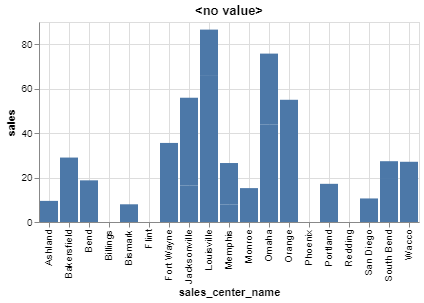

In [13]:
%chart sales_center_name, sales

#### The same chart with some non-default parameter values specified

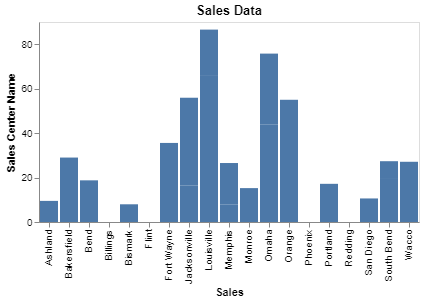

In [14]:
%chart x=sales_center_name, y=sales, gridx=false, gridy=false, title=Sales Data, labelx=Sales, labely=Sales Center Name, typex=n, typey=q, id=0

#### The color of the chart can be changed

The color parameter supports CSS color names (see https://developer.mozilla.org/en-US/docs/Web/CSS/color_value)

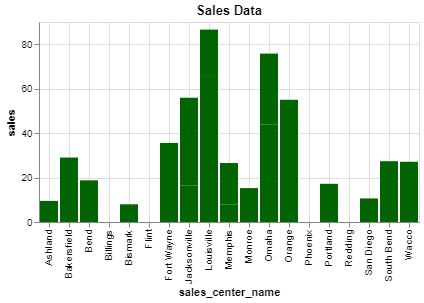

In [15]:
%chart sales_center_name, sales, title=Sales Data, color=darkgreen

#### A CSS RGB hex color specification can also be used

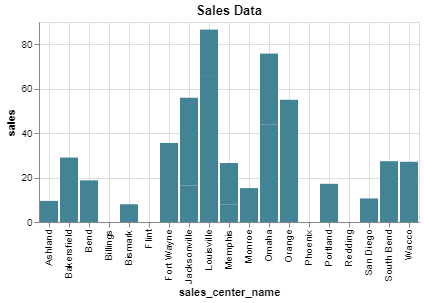

In [16]:
%chart sales_center_name, sales, title=Sales Data, color=#428495

#### The height and width of the chart can be adjusted

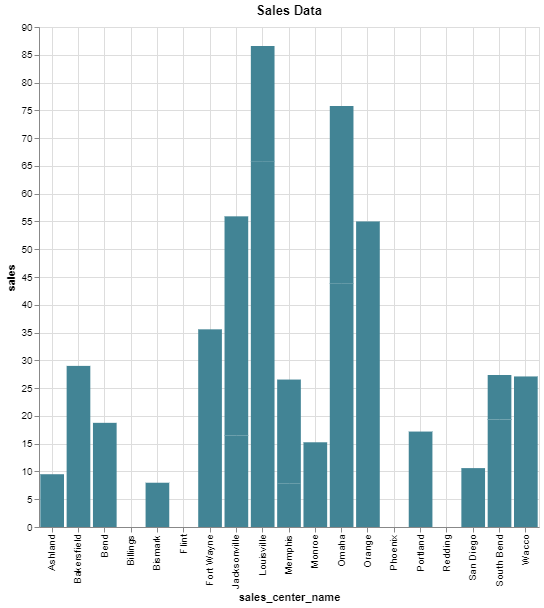

In [17]:
%chart sales_center_name, sales, title=Sales Data, color=#428495, width=500, height=500

#### Different styles of chart can be generated using the mark parameter
Supported mark types include area, bar, circle, line, point, rect, rule, square, text, tick, rect.

See the Vega-Lite specification for the complete list of mark types (https://vega.github.io/vega-lite/)

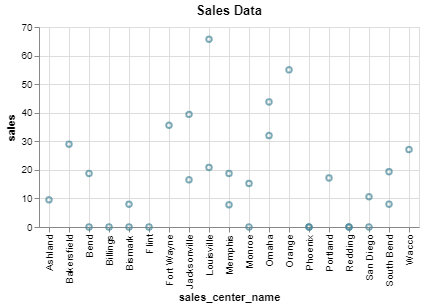

In [18]:
%chart sales_center_name, sales, title=Sales Data, color=#428495, mark=point

#### Multi series chart
Use groupingcol to produce multi series chart. It can also be used to produce stacked chart.

In [19]:
select * from stocks

,symbol,pricedate,price
1,MSFT,Jan 1 2000,39.810001373291016
2,MSFT,Feb 1 2000,36.349998474121094
3,MSFT,Mar 1 2000,43.220001220703125
4,MSFT,Apr 1 2000,28.3700008392334
5,MSFT,May 1 2000,25.450000762939453
6,MSFT,Jun 1 2000,32.540000915527344
7,MSFT,Jul 1 2000,28.399999618530273
8,MSFT,Aug 1 2000,28.399999618530273
9,MSFT,Sep 1 2000,24.530000686645508
10,MSFT,Oct 1 2000,28.020000457763672


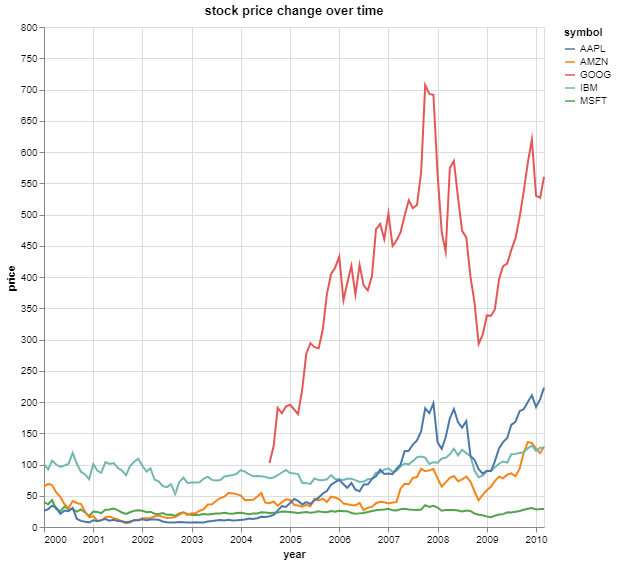

In [20]:
%chart title=stock price change over time, x=pricedate, labelx=year, y=price, typex=t, typey=q, groupingcol=symbol, typegroupingcol=n, mark=line,  height=500, width=500

#### Aggregating data
Use aggregatex or aggregatey to aggregate x or y column
Supported aggregate functions include sum, count, mean, median, min, max, variance, stdev.

See the Vega-Lite specification for the complete list of aggregate functions (https://vega.github.io/vega-lite/docs/aggregate.html#ops)

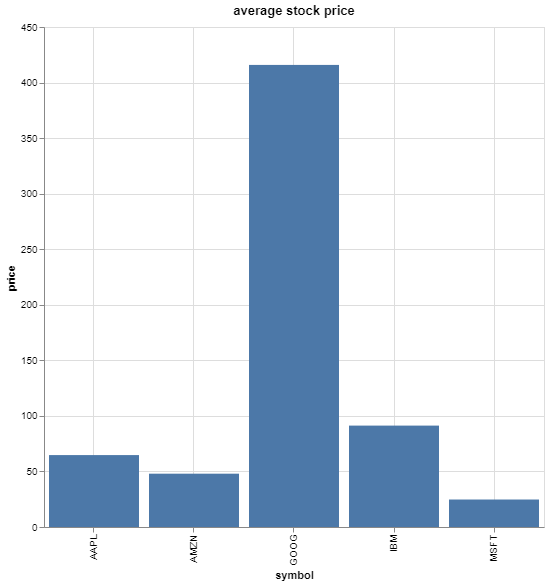

In [21]:
%chart title=average stock price, x=symbol, y=price, typey=q, aggregatey=mean, mark=bar,  height=500, width=500

#### Sorting data
Use sortx or sorty to sort data in x or y column
Supported values are 'ascending' and 'descending'

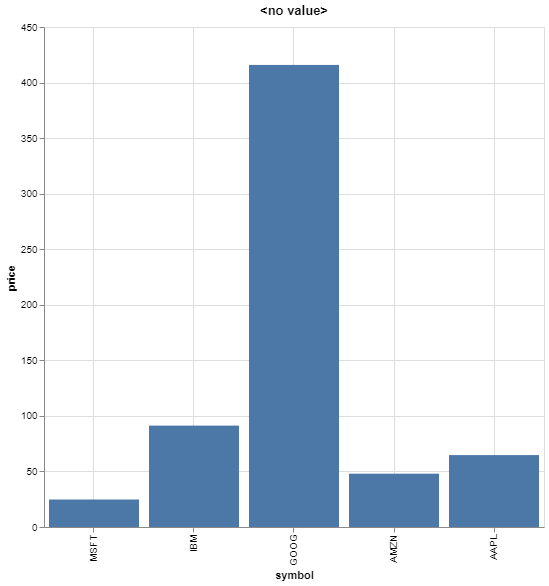

In [22]:
%chart x=symbol, y=price, typey=q, aggregatey=mean, sortx=descending, mark=bar,  height=500, width=500

#### Binning
Use binning to group continuous numeric values into a set of bins
Set binx or biny to 'true' to turn on binning

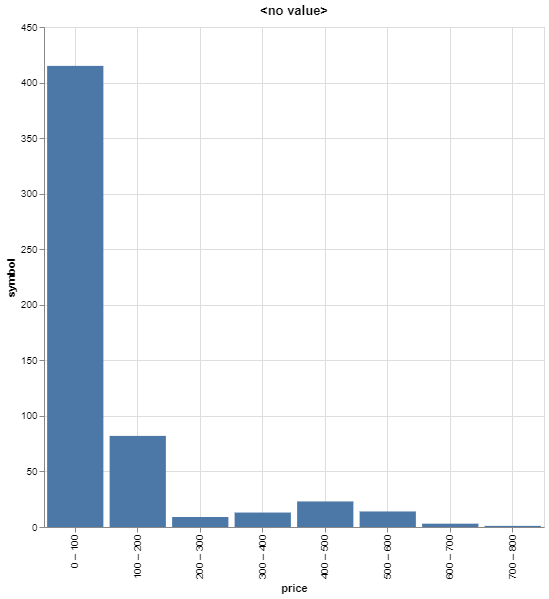

In [23]:
%chart x=price, y=symbol, binx=true, typex=n, aggregatey=count, height=500, width=500

#### Timeunit
Use timeunitx or timeunity to extract year, month, day, week from a date field

See the Vega-Lite specification for the complete list of timeunits (https://vega.github.io/vega-lite/docs/timeunit.html)

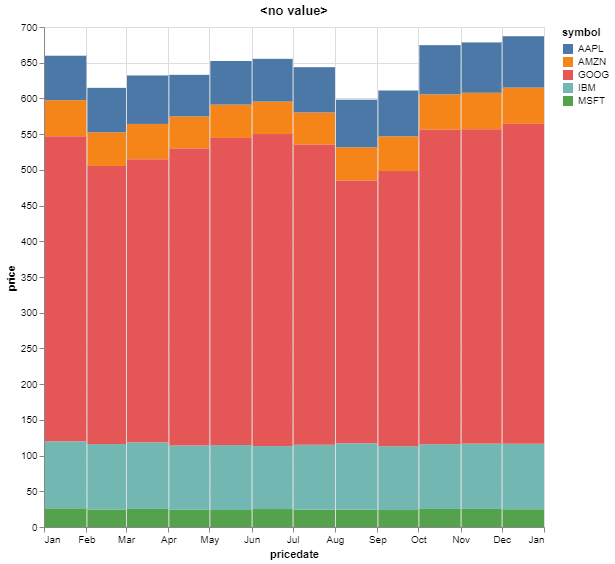

In [24]:
%chart x=pricedate, typex=t, timeunitx=month, y=price, typey=q, aggregatey=mean, mark=bar, groupingcol=symbol, height=500, width=500

#### Random sampling
Use sample to get a random sample of specified size and use it for graphing

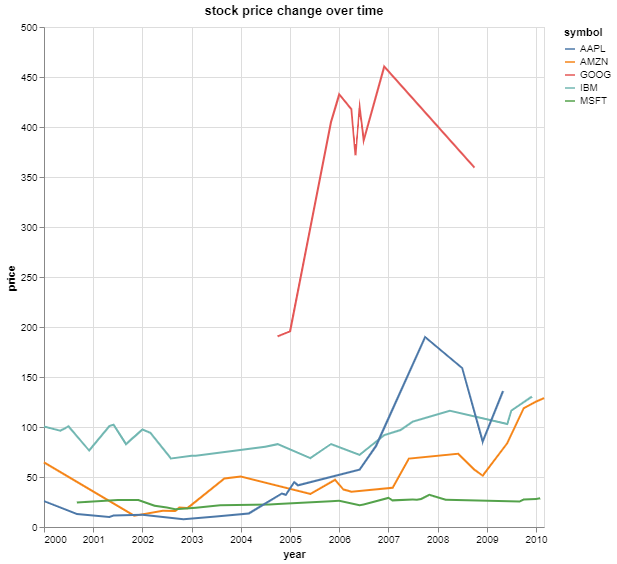

In [25]:
%chart title=stock price change over time, sample=100, x=pricedate, labelx=year, y=price, typex=t, typey=q, groupingcol=symbol, typegroupingcol=n, mark=line, height=500, width=500

---

#### Drop tables to clean up data

In [26]:
DROP TABLE SalesCenter;

Success: 15 rows affected

In [27]:
DROP TABLE SalesDemo;

Success: 17 rows affected

In [28]:
DROP TABLE stocks;

Success: 16 rows affected

Copyright 2021-2022 Teradata. All rights reserved.